In [109]:
import pandas as pd
import regex as re
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Textual Entailment Analysis

##Data Prep

In [2]:
data=pd.read_csv('/content/TimeBank_ET_both_gpt.csv')
print(len(data))
data.head(2)

3146


,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,prediction_bool,e1tense_PPF,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET
0,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,...,0,PAST,PRESENT,PAST,NON-PAST,0,(e1:exploded) is BEFORE (e2:killing),True,True,True
1,AQUAINT,embassies in the Kenyan and Tanzanian capitals...,2,killing,PRESPART,3,said,PAST,DIFFERENT,1,...,0,PRESENT,PAST,NON-PAST,PAST,1,(e2:killing) is BEFORE (e3:said),True,True,False


In [3]:
data.Entailment_actual.value_counts()

True                 1575
 False               1570
Entailment_actual       1
Name: Entailment_actual, dtype: int64

In [4]:
data[(data.Entailment_actual!='True' )&(data.Entailment_actual!=' False' )]
data.drop([7],inplace=True)

In [5]:
data.Entailment_actual=data.Entailment_actual.str.strip()
data.GPT3_5_ET=data.GPT3_5_ET.str.strip()
data.GPT4_ET=data.GPT4_ET.str.strip()
data.Entailment_actual.value_counts()

True     1575
False    1570
Name: Entailment_actual, dtype: int64

In [6]:
data.GPT3_5_ET.value_counts()

True     3039
False     106
Name: GPT3_5_ET, dtype: int64

In [7]:
data.GPT4_ET.value_counts()

False    1645
True     1415
None       85
Name: GPT4_ET, dtype: int64

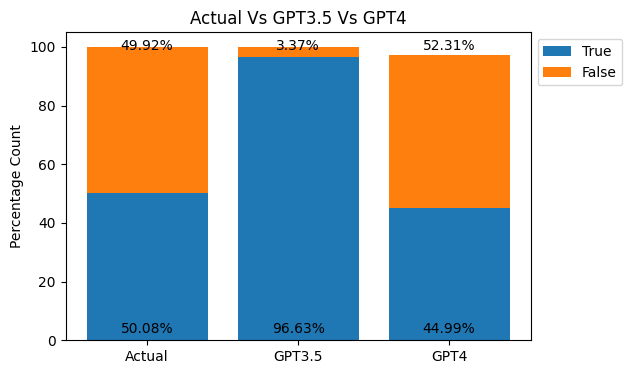

In [8]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT3.5', 'GPT4']
values1 = [len(data[data.Entailment_actual=='True'])/len(data)*100, len(data[data.GPT3_5_ET=='True'])/len(data)*100, len(data[data.GPT4_ET=='True'])/len(data)*100]
values2 = [len(data[data.Entailment_actual=='False'])/len(data)*100, len(data[data.GPT3_5_ET=='False'])/len(data)*100, len(data[data.GPT4_ET=='False'])/len(data)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT3.5 Vs GPT4')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

#Check for Consistency

In [9]:
data.head(2)

,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,prediction_bool,e1tense_PPF,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET
0,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,...,0,PAST,PRESENT,PAST,NON-PAST,0,(e1:exploded) is BEFORE (e2:killing),True,True,True
1,AQUAINT,embassies in the Kenyan and Tanzanian capitals...,2,killing,PRESPART,3,said,PAST,DIFFERENT,1,...,0,PRESENT,PAST,NON-PAST,PAST,1,(e2:killing) is BEFORE (e3:said),True,True,False


In [10]:
df = data.drop_duplicates()
print(len(df))
df.head(2)

3140


,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,prediction_bool,e1tense_PPF,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET
0,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,...,0,PAST,PRESENT,PAST,NON-PAST,0,(e1:exploded) is BEFORE (e2:killing),True,True,True
1,AQUAINT,embassies in the Kenyan and Tanzanian capitals...,2,killing,PRESPART,3,said,PAST,DIFFERENT,1,...,0,PRESENT,PAST,NON-PAST,PAST,1,(e2:killing) is BEFORE (e3:said),True,True,False


In [11]:
df.Entailment_actual.value_counts()

True     1572
False    1568
Name: Entailment_actual, dtype: int64

In [12]:
df.GPT3_5_ET.value_counts()

True     3034
False     106
Name: GPT3_5_ET, dtype: int64

In [13]:
df.GPT4_ET.value_counts()

False    1642
True     1413
None       85
Name: GPT4_ET, dtype: int64

In [14]:
#extracting the consistent and inconsistent pair
df['samelabel_gtp3_5']=df.groupby(['pair','GPT3_5_ET'], sort=False)['event1'].transform('size')
df['samelabel_gtp4']=df.groupby(['pair','GPT4_ET'], sort=False)['event1'].transform('size')
df.head(2)

,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET,samelabel_gtp3_5,samelabel_gtp4
0,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,...,PRESENT,PAST,NON-PAST,0,(e1:exploded) is BEFORE (e2:killing),True,True,True,2,1
1,AQUAINT,embassies in the Kenyan and Tanzanian capitals...,2,killing,PRESPART,3,said,PAST,DIFFERENT,1,...,PAST,NON-PAST,PAST,1,(e2:killing) is BEFORE (e3:said),True,True,False,2,2


In [15]:
df[df.pair=='0']

,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET,samelabel_gtp3_5,samelabel_gtp4
0,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,...,PRESENT,PAST,NON-PAST,0,(e1:exploded) is BEFORE (e2:killing),True,True,True,2,1
1573,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,...,PRESENT,PAST,NON-PAST,0,(e1:exploded) is AFTER (e2:killing),False,True,False,2,1


We see from the above exmaple that GPT4 gave a cobsistent response to this pair as True and False whereas GPT-3.5 responded as True and True. Hence samelalbel_gpt3_5 was marked as 2 - Inconsistent while samelabel_gpt4 was marked as 1- consistent.

In [16]:
print("1- consistent (TF/FT)    2- Inconsistent ( TT/FF)")
print("*******************************************")
print("GPT 3.5")
print(df.samelabel_gtp3_5.value_counts())
print("*******************************************")
print("GPT 4")
print(df.samelabel_gtp4.value_counts())
print("*******************************************")
print("Here Label 1 says that one of the values is true and other is false in a pair. Label 2 is if both the values in the pair are either true or False")

1- consistent (TF/FT)    2- Inconsistent ( TT/FF)
*******************************************
GPT 3.5
2    2970
1     170
Name: samelabel_gtp3_5, dtype: int64
*******************************************
GPT 4
1    2122
2    1018
Name: samelabel_gtp4, dtype: int64
*******************************************
Here Label 1 says that one of the values is true and other is false in a pair. Label 2 is if both the values in the pair are either true or False


In [17]:
print(df.samelabel_gtp3_5.value_counts()/len(df)*100)

2    94.585987
1     5.414013
Name: samelabel_gtp3_5, dtype: float64


In [18]:
print(df.samelabel_gtp4.value_counts()/len(df)*100)

1    67.579618
2    32.420382
Name: samelabel_gtp4, dtype: float64


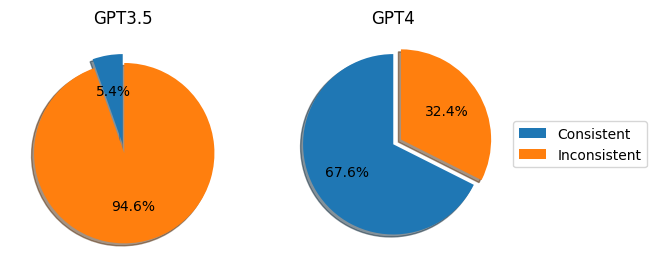

In [19]:
val1=df.samelabel_gtp3_5.value_counts().sort_index().values.tolist()
val2=df.samelabel_gtp4.value_counts().sort_index().values.tolist()
categories = ['GPT3.5', 'GPT4']
values1 = [val1[0] /len(df)*100,val2[0] /len(df)*100 ]
values2 = [val1[1] /len(df)*100,val2[1] /len(df)*100]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels = 'Consistent', 'Inconsistent'
sizes = [val1[0] /len(df)*100,val1[1] /len(df)*100]
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title("GPT3.5")
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',
       shadow=True, startangle=90)
sizes = [val2[0] /len(df)*100,val2[1] /len(df)*100]
ax2.set_title("GPT4")
ax2.pie(sizes, explode=explode,  autopct='%1.1f%%',
       shadow=True, startangle=90)
ax2.legend(labels,
          title="",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


We observe that GPT-4 is more consistent compared GPT-3.5.

In [20]:
consistent_GPT3_5=df[df.samelabel_gtp3_5==1]
inconsistent_GPT3_5=df[df.samelabel_gtp3_5==2]

consistent_GPT4=df[df.samelabel_gtp4==1]
inconsistent_GPT4=df[df.samelabel_gtp4==2]

##Consistency 3.5 & 4

In [21]:
print(len(consistent_GPT3_5.groupby('pair').filter(lambda x: len(x) != 2)))
print(len(consistent_GPT4.groupby('pair').filter(lambda x: len(x) != 2)))

12
12


There are 12 records which are not in pairs remove them before comparison.

In [22]:
print(len(consistent_GPT3_5))
consistent_GPT3_5=consistent_GPT3_5.groupby('pair').filter(lambda x: len(x) == 2)
print(len(consistent_GPT3_5))
consistent_GPT3_5.head(2)

170
158


,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET,samelabel_gtp3_5,samelabel_gtp4
25,AQUAINT,APW19980810.0907 MISCELLANEOUS TEXT (slug-fi...,5,Injured,PAST,3,bombings,NONE,NONE,2,...,NONE,PAST,NON-PAST,24,(e5:Injured) is BEFORE (e3:bombings),False,False,False,1,1
28,AQUAINT,APW19980810.0907 MISCELLANEOUS TEXT (slug-fi...,6,Injured,PAST,3,bombings,NONE,NONE,2,...,NONE,PAST,NON-PAST,27,(e6:Injured) is BEFORE (e3:bombings),False,False,False,1,1


In [23]:
print(len(consistent_GPT4))
consistent_GPT4=consistent_GPT4[consistent_GPT4.GPT4_ET!='None'] # removing those where the value is neither True nor False
consistent_GPT4=consistent_GPT4.groupby('pair').filter(lambda x: len(x) == 2)
print(len(consistent_GPT4))
consistent_GPT4.head(2)

2122
2040


,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET,samelabel_gtp3_5,samelabel_gtp4
0,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,...,PRESENT,PAST,NON-PAST,0,(e1:exploded) is BEFORE (e2:killing),True,True,True,2,1
5,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,5,said,PAST,6,refused,PAST,SAME,1,...,PAST,PAST,PAST,5,(e5:said) is BEFORE (e6:refused),True,True,True,2,1


In [24]:
consistent_GPT3_5.Relation.value_counts()

BEFORE    98
AFTER     60
Name: Relation, dtype: int64

In [25]:
consistent_GPT3_5.Entailment_actual.value_counts()

False    79
True     79
Name: Entailment_actual, dtype: int64

In [26]:
consistent_GPT3_5.GPT3_5_ET.value_counts()

False    79
True     79
Name: GPT3_5_ET, dtype: int64

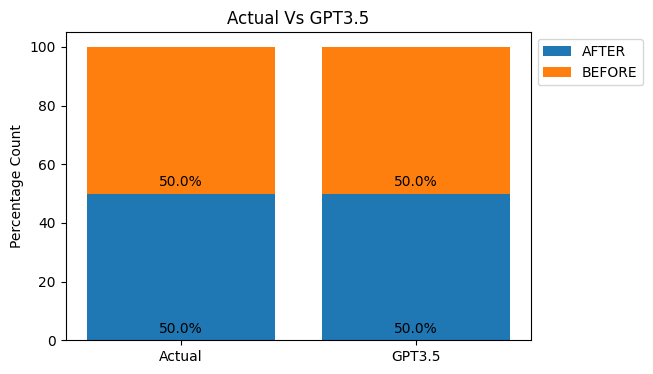

In [27]:
import matplotlib.pyplot as plt
total_len=len(consistent_GPT3_5)
# Sample data
categories = ['Actual', 'GPT3.5']
values1 = [len(consistent_GPT3_5[((consistent_GPT3_5['Entailment_actual']=='True')& (consistent_GPT3_5['Relation']=='AFTER'))|((consistent_GPT3_5['Entailment_actual']=='False')& (consistent_GPT3_5['Relation']=='BEFORE'))])/len(consistent_GPT3_5)*100,
           len(consistent_GPT3_5[((consistent_GPT3_5['GPT3_5_ET']=='True')& (consistent_GPT3_5['Relation']=='AFTER'))|((consistent_GPT3_5['GPT3_5_ET']=='False')& (consistent_GPT3_5['Relation']=='BEFORE'))])/len(consistent_GPT3_5)*100]
values2 = [len(consistent_GPT3_5[((consistent_GPT3_5['Entailment_actual']=='True')& (consistent_GPT3_5['Relation']=='BEFORE'))|((consistent_GPT3_5['Entailment_actual']=='False')& (consistent_GPT3_5['Relation']=='AFTER'))])/len(consistent_GPT3_5)*100,
           len(consistent_GPT3_5[((consistent_GPT3_5['GPT3_5_ET']=='True')& (consistent_GPT3_5['Relation']=='BEFORE'))|((consistent_GPT3_5['GPT3_5_ET']=='False')& (consistent_GPT3_5['Relation']=='AFTER'))])/len(consistent_GPT3_5)*100]
# values2 = [len(consistent_GPT3_5[(consistent_GPT3_5['Entailment_actual']=='True')& (consistent_GPT3_5['Relation']=='BEFORE')])/total_len*100,
#            len(consistent_GPT3_5[(consistent_GPT3_5['GPT3_5_ET']=='True')& (consistent_GPT3_5['Relation']=='BEFORE')])/total_len*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='AFTER')
bar2 = plt.bar(categories, values2, bottom=values1, label='BEFORE')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT3.5')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()


We observe that in consistent pair for explicit events the model reamins unbiased for GPT-3.5.

In [28]:
consistent_GPT4.Relation.value_counts()

BEFORE    1146
AFTER      894
Name: Relation, dtype: int64

In [29]:
consistent_GPT4.Entailment_actual.value_counts()

True     1020
False    1020
Name: Entailment_actual, dtype: int64

In [30]:
consistent_GPT4.GPT4_ET.value_counts()

True     1020
False    1020
Name: GPT4_ET, dtype: int64

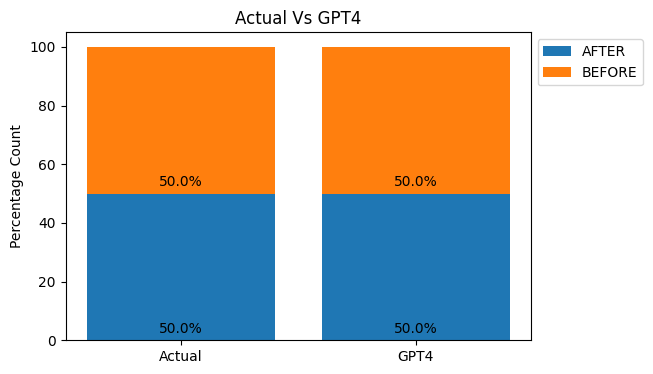

In [97]:
import matplotlib.pyplot as plt
total_len=len(consistent_GPT4)
# Sample data
categories = ['Actual', 'GPT4']
values1 = [len(consistent_GPT4[((consistent_GPT4['Entailment_actual']=='True')& (consistent_GPT4['Relation']=='AFTER'))|((consistent_GPT4['Entailment_actual']=='False')& (consistent_GPT4['Relation']=='BEFORE'))])/len(consistent_GPT4)*100,
          len(consistent_GPT4[((consistent_GPT4['GPT4_ET']=='True')& (consistent_GPT4['Relation']=='AFTER'))|((consistent_GPT4['GPT4_ET']=='False')& (consistent_GPT4['Relation']=='BEFORE'))])/len(consistent_GPT4)*100]
values2 = [len(consistent_GPT4[((consistent_GPT4['Entailment_actual']=='True')& (consistent_GPT4['Relation']=='BEFORE'))|((consistent_GPT4['Entailment_actual']=='False')& (consistent_GPT4['Relation']=='AFTER'))])/len(consistent_GPT4)*100,
          len(consistent_GPT4[((consistent_GPT4['GPT4_ET']=='True')& (consistent_GPT4['Relation']=='BEFORE'))|((consistent_GPT4['GPT4_ET']=='False')& (consistent_GPT4['Relation']=='AFTER'))])/len(consistent_GPT4)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='AFTER')
bar2 = plt.bar(categories, values2, bottom=values1, label='BEFORE')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT4')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()



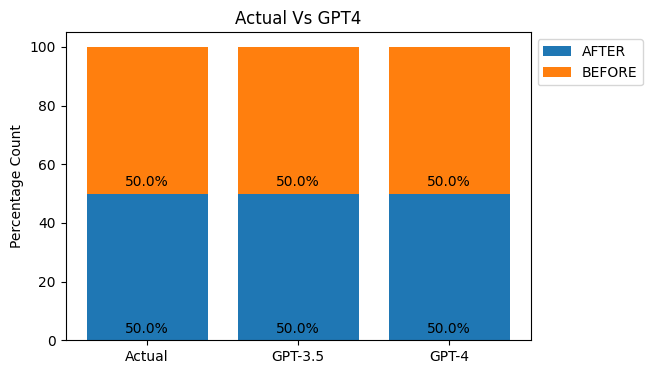

In [96]:
import matplotlib.pyplot as plt
total_len=len(consistent_GPT4)
# Sample data
categories = ['Actual', 'GPT-3.5','GPT-4']
values1 = [len(consistent_GPT4[((consistent_GPT4['Entailment_actual']=='True')& (consistent_GPT4['Relation']=='AFTER'))|((consistent_GPT4['Entailment_actual']=='False')& (consistent_GPT4['Relation']=='BEFORE'))])/len(consistent_GPT4)*100,
           len(consistent_GPT3_5[((consistent_GPT3_5['GPT3_5_ET']=='True')& (consistent_GPT3_5['Relation']=='AFTER'))|((consistent_GPT3_5['GPT3_5_ET']=='False')& (consistent_GPT3_5['Relation']=='BEFORE'))])/len(consistent_GPT3_5)*100,
          len(consistent_GPT4[((consistent_GPT4['GPT4_ET']=='True')& (consistent_GPT4['Relation']=='AFTER'))|((consistent_GPT4['GPT4_ET']=='False')& (consistent_GPT4['Relation']=='BEFORE'))])/len(consistent_GPT4)*100]
values2 = [len(consistent_GPT4[((consistent_GPT4['Entailment_actual']=='True')& (consistent_GPT4['Relation']=='BEFORE'))|((consistent_GPT4['Entailment_actual']=='False')& (consistent_GPT4['Relation']=='AFTER'))])/len(consistent_GPT4)*100,
           len(consistent_GPT3_5[((consistent_GPT3_5['GPT3_5_ET']=='True')& (consistent_GPT3_5['Relation']=='BEFORE'))|((consistent_GPT3_5['GPT3_5_ET']=='False')& (consistent_GPT3_5['Relation']=='AFTER'))])/len(consistent_GPT3_5)*100,
          len(consistent_GPT4[((consistent_GPT4['GPT4_ET']=='True')& (consistent_GPT4['Relation']=='BEFORE'))|((consistent_GPT4['GPT4_ET']=='False')& (consistent_GPT4['Relation']=='AFTER'))])/len(consistent_GPT4)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='AFTER')
bar2 = plt.bar(categories, values2, bottom=values1, label='BEFORE')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT4')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()



In Explicit events with TE format the model is able to predict rightly and we do not observe any bias in both the models.

#Inconsistency 3.5 & 4

In [32]:
inconsistent_GPT3_5.head(2)

,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET,samelabel_gtp3_5,samelabel_gtp4
0,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,...,PRESENT,PAST,NON-PAST,0,(e1:exploded) is BEFORE (e2:killing),True,True,True,2,1
1,AQUAINT,embassies in the Kenyan and Tanzanian capitals...,2,killing,PRESPART,3,said,PAST,DIFFERENT,1,...,PAST,NON-PAST,PAST,1,(e2:killing) is BEFORE (e3:said),True,True,False,2,2


In [33]:
inconsistent_GPT3_5.Entailment_actual.value_counts()

True     1485
False    1485
Name: Entailment_actual, dtype: int64

In [34]:
inconsistent_GPT3_5.GPT3_5_ET.value_counts()

True     2944
False      26
Name: GPT3_5_ET, dtype: int64

In [35]:
inconsistent_GPT4.GPT4_ET.value_counts()

False    600
True     368
None      50
Name: GPT4_ET, dtype: int64

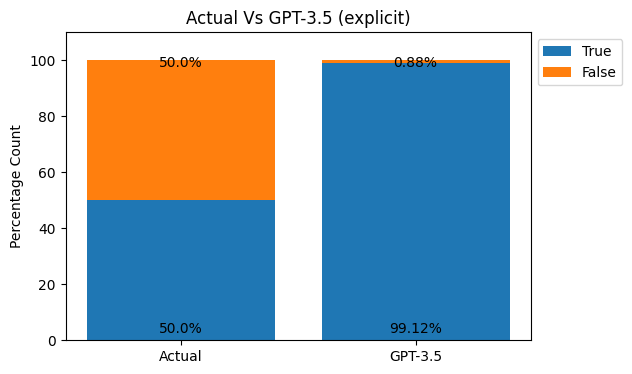

In [100]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT-3.5']
values1 = [len(inconsistent_GPT3_5[inconsistent_GPT3_5.Entailment_actual=='True'])/len(inconsistent_GPT3_5)*100, len(inconsistent_GPT3_5[inconsistent_GPT3_5.GPT3_5_ET=='True'])/len(inconsistent_GPT3_5)*100]
values2 = [len(inconsistent_GPT3_5[inconsistent_GPT3_5.Entailment_actual=='False'])/len(inconsistent_GPT3_5)*100, len(inconsistent_GPT3_5[inconsistent_GPT3_5.GPT3_5_ET=='False'])/len(inconsistent_GPT3_5)*100]
# values3= [len(inconsistent_GPT3_5[inconsistent_GPT3_5.Entailment_actual=='None'])/len(inconsistent_GPT3_5)*100, len(inconsistent_GPT3_5[inconsistent_GPT3_5.GPT3_5_ET=='None'])/len(inconsistent_GPT3_5)*100,len(inconsistent_GPT4[inconsistent_GPT4.GPT4_ET=='None'])/len(inconsistent_GPT4)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')
# bar3 = plt.bar(categories, values3, bottom=[values1[i] + values2[i] for i in range(len(values1))], label='None')
pos=[50,102,95]
plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT-3.5 (explicit)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.axhline(y=len(inconsistent_GPT3_5[inconsistent_GPT3_5.Entailment_actual=='True'])/len(inconsistent_GPT3_5)*100, color='purple', linestyle='--', label='Horizontal Line at y=3')
for i, bars in enumerate([bar1, bar3,bar2]):
    for bar in bars:
        height = bar.get_height()
        bottom = sum([bars[j].get_height() for j in range(i)]) if i > 0 else 0
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            if height > 0:
              plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, pos[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
plt.ylim(0, 110)
plt.show()

We observe that in inconsistent pair , GPT-3.5 is biased towards TRUE.

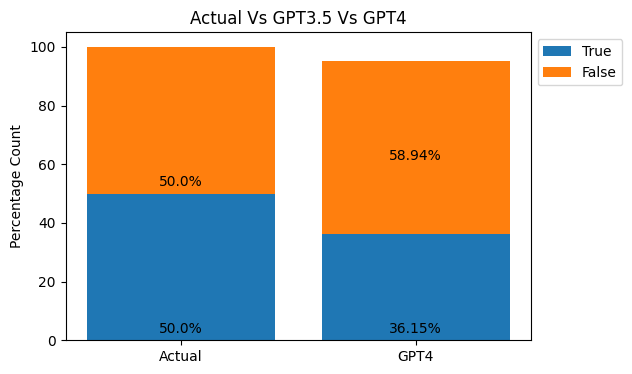

In [101]:

import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT4']
values1 = [len(inconsistent_GPT4[inconsistent_GPT4.Entailment_actual=='True'])/len(inconsistent_GPT4)*100, len(inconsistent_GPT4[inconsistent_GPT4.GPT4_ET=='True'])/len(inconsistent_GPT4)*100]
values2 = [len(inconsistent_GPT4[inconsistent_GPT4.Entailment_actual=='False'])/len(inconsistent_GPT4)*100, len(inconsistent_GPT4[inconsistent_GPT4.GPT4_ET=='False'])/len(inconsistent_GPT4)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT3.5 Vs GPT4')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

We observe that in inconsistent pair , GPT-4 is biased towards FALSE.

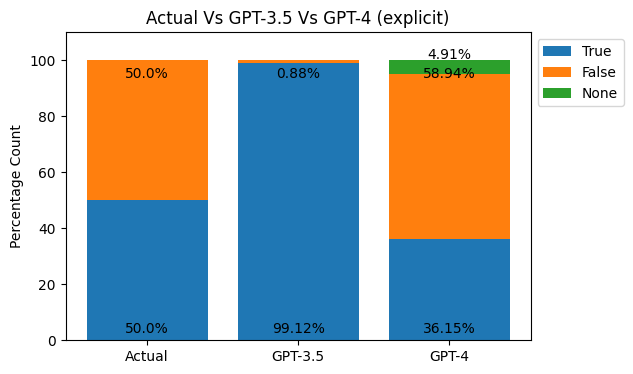

In [90]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Actual', 'GPT-3.5','GPT-4']
values1 = [len(inconsistent_GPT3_5[inconsistent_GPT3_5.Entailment_actual=='True'])/len(inconsistent_GPT3_5)*100, len(inconsistent_GPT3_5[inconsistent_GPT3_5.GPT3_5_ET=='True'])/len(inconsistent_GPT3_5)*100,len(inconsistent_GPT4[inconsistent_GPT4.GPT4_ET=='True'])/len(inconsistent_GPT4)*100]
values2 = [len(inconsistent_GPT3_5[inconsistent_GPT3_5.Entailment_actual=='False'])/len(inconsistent_GPT3_5)*100, len(inconsistent_GPT3_5[inconsistent_GPT3_5.GPT3_5_ET=='False'])/len(inconsistent_GPT3_5)*100,len(inconsistent_GPT4[inconsistent_GPT4.GPT4_ET=='False'])/len(inconsistent_GPT4)*100]
values3= [len(inconsistent_GPT3_5[inconsistent_GPT3_5.Entailment_actual=='None'])/len(inconsistent_GPT3_5)*100, len(inconsistent_GPT3_5[inconsistent_GPT3_5.GPT3_5_ET=='None'])/len(inconsistent_GPT3_5)*100,len(inconsistent_GPT4[inconsistent_GPT4.GPT4_ET=='None'])/len(inconsistent_GPT4)*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='True')
bar2 = plt.bar(categories, values2, bottom=values1, label='False')
bar3 = plt.bar(categories, values3, bottom=[values1[i] + values2[i] for i in range(len(values1))], label='None')
pos=[50,100,95]
plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT-3.5 Vs GPT-4 (explicit)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.axhline(y=len(inconsistent_GPT3_5[inconsistent_GPT3_5.Entailment_actual=='True'])/len(inconsistent_GPT3_5)*100, color='purple', linestyle='--', label='Horizontal Line at y=3')
for i, bars in enumerate([bar1, bar3,bar2]):
    for bar in bars:
        height = bar.get_height()
        bottom = sum([bars[j].get_height() for j in range(i)]) if i > 0 else 0
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            if height > 0:
              plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, pos[i]-i*2),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
plt.ylim(0, 110)
plt.show()

#Conclusion for TE Explicit Events

**Overall observation for TE format for explicit events stands as follows:**
  1. Consistency: GPT-4 is more consistent compared GPT-3.5
  2. True/ False bias overal and with specific to inconsistent pair : GPT-3.5 is biased towards True and GPT-4 biased towards False.
  3. BEFORE/AFTER relation bias : Here no bias is observed.

  **Pattern :**
  1. AFTER/ TRUE- GPT-3.5
  2. BEFORE/FALSE-GPT-4

#QA Format

In [103]:
import seaborn as sns
qa_data=pd.read_csv('/content/all_data_QA_both.csv')
print(len(qa_data))
qa_data.head(2)

1576


,Unnamed: 0,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,no_of_events,word_count,sent_count,Relation,prediction,GPT4,GPT3_5_QA,GPT4_QA
0,0,AQUAINT,APW19980807.0261 NEWS STORY 08/07/1998 06:1...,1,exploded,PAST,2,killing,PRESPART,DIFFERENT,1,3,75,2,BEFORE,AFTER,BEFORE,after,before
1,1,AQUAINT,embassies in the Kenyan and Tanzanian capitals...,2,killing,PRESPART,3,said,PAST,DIFFERENT,1,2,13,1,BEFORE,AFTER,BEFORE,before,before


In [106]:
qa_data.GPT3_5_QA.value_counts()
qa_data.GPT3_5_QA=qa_data.GPT3_5_QA.str.strip()
qa_data.GPT3_5_QA=qa_data.GPT3_5_QA.str.upper()
qa_data.GPT3_5_QA.value_counts()

AFTER     815
BEFORE    761
Name: GPT3_5_QA, dtype: int64

In [107]:
qa_data.GPT4_QA.value_counts()
qa_data.GPT4_QA=qa_data.GPT4_QA.str.strip()
qa_data.GPT4_QA=qa_data.GPT4_QA.str.upper()
qa_data.GPT4_QA.value_counts()

BEFORE    1057
AFTER      519
Name: GPT4_QA, dtype: int64

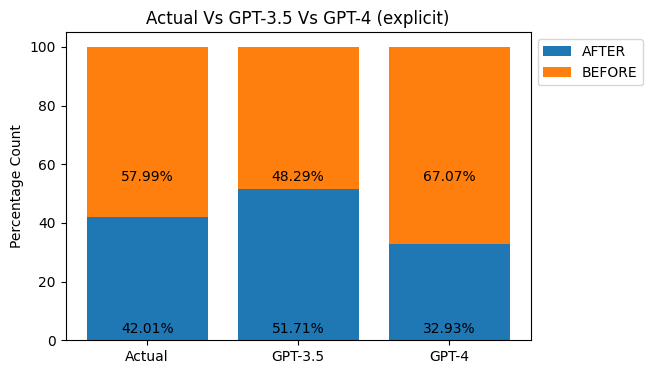

In [108]:
import matplotlib.pyplot as plt
total_len=len(qa_data)
# Sample data
categories = ['Actual', 'GPT-3.5','GPT-4']
values1 = [len(qa_data[(qa_data['Relation']=='AFTER')])/total_len*100,
           len(qa_data[(qa_data['GPT3_5_QA']=='AFTER')])/total_len*100,
           len(qa_data[(qa_data['GPT4_QA']=='AFTER')])/total_len*100]
values2 = [len(qa_data[(qa_data['Relation']=='BEFORE')])/total_len*100,
           len(qa_data[(qa_data['GPT3_5_QA']=='BEFORE')])/total_len*100,
           len(qa_data[(qa_data['GPT4_QA']=='BEFORE')])/total_len*100]

# Creating the stacked bar chart
plt.figure(figsize=(6, 4))

bar1 = plt.bar(categories, values1, label='AFTER')
bar2 = plt.bar(categories, values2, bottom=values1, label='BEFORE')

plt.xlabel('')
plt.ylabel('Percentage Count')
plt.title('Actual Vs GPT-3.5 Vs GPT-4 (explicit)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for i, bars in enumerate([bar1, bar2]):
    for bar in bars:
        height = bar.get_height()
        if i == 0:
            plt.annotate('{}%'.format(round(height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, 0),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')
        else:
            total_height = height
            plt.annotate('{}%'.format(round(total_height,2)),
                         xy=(bar.get_x() + bar.get_width() / 2, values1[i]),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

plt.show()

#Accuracy , Precision, F1 and confusion matrix

##QA Results

QA 3.5 Actual
 BEFORE    914
AFTER     662
Name: Relation, dtype: int64
------------------------------------------------------------------------------
QA 3.5 GPT3.5
 AFTER     815
BEFORE    761
Name: GPT3_5_QA, dtype: int64
------------------------------------------------------------------------------
Accuracy: 50.82%
Precision of AFTER & BEFORE ['0.43', '0.59']
F1 of AFTER & BEFORE ['0.48', '0.54']
Recall of AFTER & BEFORE ['0.53', '0.49']
-----------------------------------------------------------------------------
        AFTER  BEFORE
AFTER     351     311
BEFORE    464     450


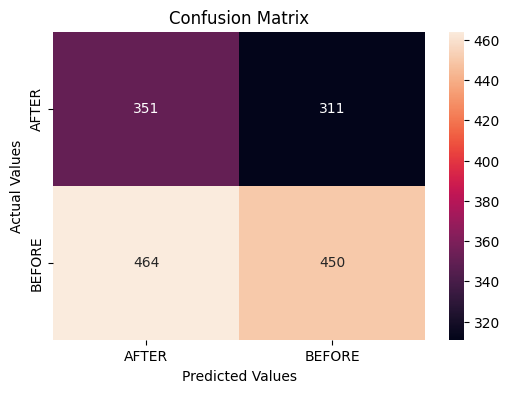

In [111]:
QAacc3_5 = accuracy_score(qa_data.Relation, qa_data.GPT3_5_QA)
print("QA 3.5 Actual\n",qa_data.Relation.value_counts())
print("------------------------------------------------------------------------------")
print("QA 3.5 GPT3.5\n",qa_data.GPT3_5_QA.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {QAacc3_5 * 100:.2f}%")
precision = precision_score(qa_data.Relation, qa_data.GPT3_5_QA, average=None)
print("Precision of AFTER & BEFORE", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(qa_data.Relation, qa_data.GPT3_5_QA, average=None)
print("F1 of AFTER & BEFORE",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(qa_data.Relation, qa_data.GPT3_5_QA,average=None)
print("Recall of AFTER & BEFORE",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(qa_data.Relation, qa_data.GPT3_5_QA)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['AFTER','BEFORE'],
                     columns =  ['AFTER','BEFORE'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

QA Actual
 BEFORE    914
AFTER     662
Name: Relation, dtype: int64
------------------------------------------------------------------------------
QA GPT3.5
 BEFORE    1057
AFTER      519
Name: GPT4_QA, dtype: int64
------------------------------------------------------------------------------
Accuracy: 64.28%
Precision of AFTER & BEFORE ['0.60', '0.67']
F1 of  AFTER & BEFORE ['0.52', '0.71']
Recall of  AFTER & BEFORE ['0.47', '0.77']
-----------------------------------------------------------------------------
        AFTER  BEFORE
AFTER     309     353
BEFORE    210     704


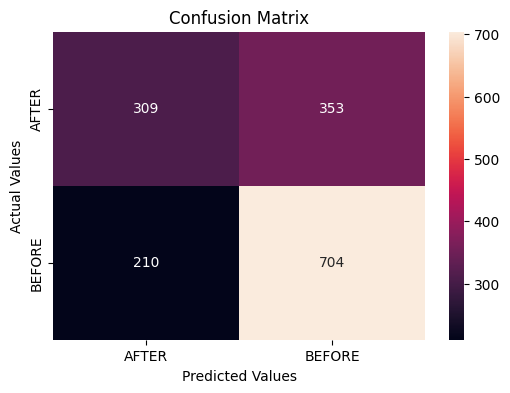

In [112]:
QA_acc4= accuracy_score(qa_data.Relation, qa_data.GPT4_QA)
print("QA Actual\n",qa_data.Relation.value_counts())
print("------------------------------------------------------------------------------")
print("QA GPT3.5\n",qa_data.GPT4_QA.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {QA_acc4 * 100:.2f}%")
precision = precision_score(qa_data.Relation, qa_data.GPT4_QA, average=None)
print("Precision of AFTER & BEFORE", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(qa_data.Relation, qa_data.GPT4_QA, average=None)
print("F1 of  AFTER & BEFORE",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(qa_data.Relation, qa_data.GPT4_QA,average=None)
print("Recall of  AFTER & BEFORE",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(qa_data.Relation, qa_data.GPT4_QA)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['AFTER','BEFORE'],
                     columns =  ['AFTER','BEFORE'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

##TE Results

In [116]:
consistent_GPT3_5.head(2)

,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,e2tense_PPF,e1tense_PNP,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET,samelabel_gtp3_5,samelabel_gtp4
25,AQUAINT,APW19980810.0907 MISCELLANEOUS TEXT (slug-fi...,5,Injured,PAST,3,bombings,NONE,NONE,2,...,NONE,PAST,NON-PAST,24,(e5:Injured) is BEFORE (e3:bombings),False,False,False,1,1
28,AQUAINT,APW19980810.0907 MISCELLANEOUS TEXT (slug-fi...,6,Injured,PAST,3,bombings,NONE,NONE,2,...,NONE,PAST,NON-PAST,27,(e6:Injured) is BEFORE (e3:bombings),False,False,False,1,1


In [117]:
consistent_GPT3_5['cons_pred']=consistent_GPT3_5.GPT3_5_ET.str.upper() + ' ' +consistent_GPT3_5.Relation.str.upper()
consistent_GPT3_5['cons_actual']=consistent_GPT3_5.Entailment_actual.str.upper() + ' ' +consistent_GPT3_5.Relation.str.upper()
consistent_GPT4['cons_pred']=consistent_GPT4.GPT4_ET.str.upper() + ' ' +consistent_GPT4.Relation.str.upper()
consistent_GPT4['cons_actual']=consistent_GPT4.Entailment_actual.str.upper() + ' ' +consistent_GPT4.Relation.str.upper()
consistent_GPT3_5.head(2)

,key,context,e1id,event1,e1tense,e2id,event2,e2tense,verb_tense,event1_pos,...,e2tense_PNP,pair,statement,Entailment_actual,GPT3_5_ET,GPT4_ET,samelabel_gtp3_5,samelabel_gtp4,cons_pred,cons_actual
25,AQUAINT,APW19980810.0907 MISCELLANEOUS TEXT (slug-fi...,5,Injured,PAST,3,bombings,NONE,NONE,2,...,NON-PAST,24,(e5:Injured) is BEFORE (e3:bombings),False,False,False,1,1,FALSE AFTER,FALSE AFTER
28,AQUAINT,APW19980810.0907 MISCELLANEOUS TEXT (slug-fi...,6,Injured,PAST,3,bombings,NONE,NONE,2,...,NON-PAST,27,(e6:Injured) is BEFORE (e3:bombings),False,False,False,1,1,FALSE AFTER,FALSE AFTER


In [118]:
consistent_GPT3_5.cons_pred.value_counts()

TRUE BEFORE     49
FALSE BEFORE    49
FALSE AFTER     30
TRUE AFTER      30
Name: cons_pred, dtype: int64

In [119]:
consistent_GPT3_5.cons_actual.value_counts()

TRUE BEFORE     49
FALSE BEFORE    49
FALSE AFTER     30
TRUE AFTER      30
Name: cons_actual, dtype: int64

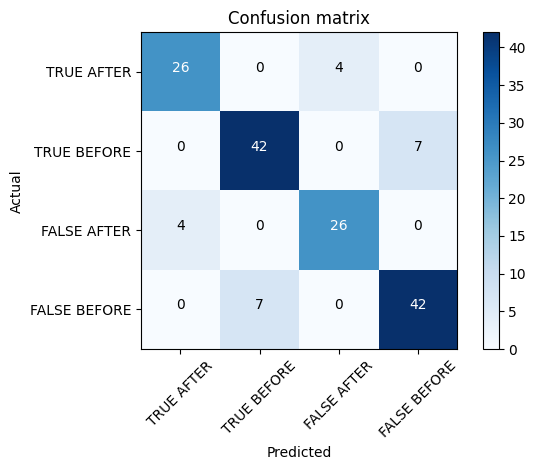

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
actual = consistent_GPT3_5.cons_actual
predicted = consistent_GPT3_5.cons_pred
cm = confusion_matrix(actual, predicted)
# sns.heatmap(cm, annot=True,fmt='d')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
classes = ['TRUE AFTER', 'TRUE BEFORE', 'FALSE AFTER', 'FALSE BEFORE']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


Inconsistent Actual
 True     1485
False    1485
Name: Entailment_actual, dtype: int64
------------------------------------------------------------------------------
Inconsistent GPT3.5
 True     2944
False      26
Name: GPT3_5_ET, dtype: int64
------------------------------------------------------------------------------
Accuracy: 50.00%
Precision of False & True ['0.50', '0.50']
F1 of False & True ['0.02', '0.66']
Recall of False & True ['0.01', '0.99']
-----------------------------------------------------------------------------
       False  True
False     13  1472
True      13  1472


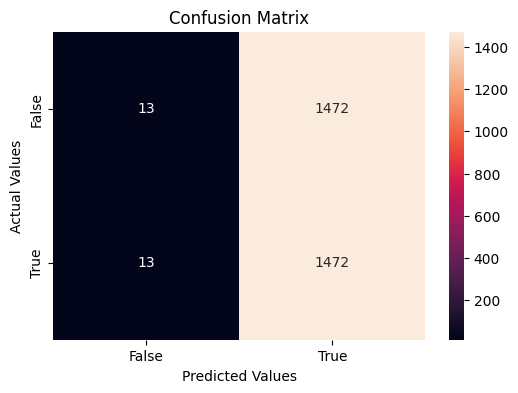

In [122]:
inconsis_acc3_5= accuracy_score(inconsistent_GPT3_5.Entailment_actual, inconsistent_GPT3_5.GPT3_5_ET)
print("Inconsistent Actual\n",inconsistent_GPT3_5.Entailment_actual.value_counts())
print("------------------------------------------------------------------------------")
print("Inconsistent GPT3.5\n",inconsistent_GPT3_5.GPT3_5_ET.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {inconsis_acc3_5 * 100:.2f}%")
precision = precision_score(inconsistent_GPT3_5.Entailment_actual, inconsistent_GPT3_5.GPT3_5_ET, average=None)
print("Precision of False & True", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(inconsistent_GPT3_5.Entailment_actual, inconsistent_GPT3_5.GPT3_5_ET, average=None)
print("F1 of False & True",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(inconsistent_GPT3_5.Entailment_actual, inconsistent_GPT3_5.GPT3_5_ET,average=None)
print("Recall of False & True",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(inconsistent_GPT3_5.Entailment_actual, inconsistent_GPT3_5.GPT3_5_ET)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['False','True'],
                     columns =  ['False','True'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [123]:
consistent_GPT4.cons_actual.value_counts()

TRUE BEFORE     573
FALSE BEFORE    573
FALSE AFTER     447
TRUE AFTER      447
Name: cons_actual, dtype: int64

In [ ]:
consistent_GPT4.cons_pred.value_counts()

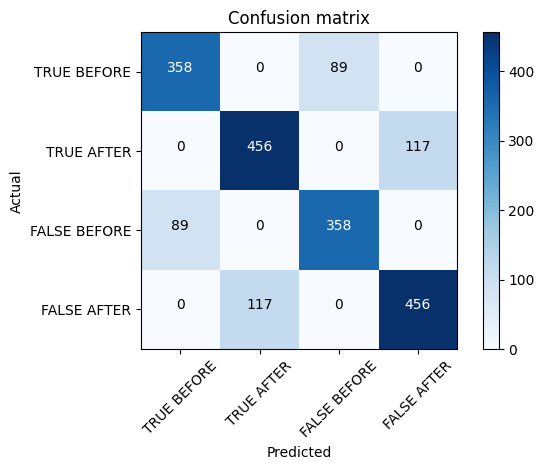

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
actual = consistent_GPT4.cons_actual
predicted = consistent_GPT4.cons_pred
cm = confusion_matrix(actual, predicted)
# sns.heatmap(cm, annot=True,fmt='d')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
classes = ['TRUE BEFORE', 'TRUE AFTER', 'FALSE BEFORE', 'FALSE AFTER']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Inconsistent GPT4 actual
 True     509
False    509
Name: Entailment_actual, dtype: int64
------------------------------------------------------------------------------
Inconsistent GPT4
 False    600
True     368
None      50
Name: GPT4_ET, dtype: int64
------------------------------------------------------------------------------
Accuracy: 47.54%
Precision of 'False','None','True' ['0.50', '0.00', '0.50']
F1 of 'False','None','True' ['0.54', '0.00', '0.42']
Recall of 'False','None','True' ['0.59', '0.00', '0.36']
-----------------------------------------------------------------------------
       False  None  True
False    300    25   184
None       0     0     0
True     300    25   184


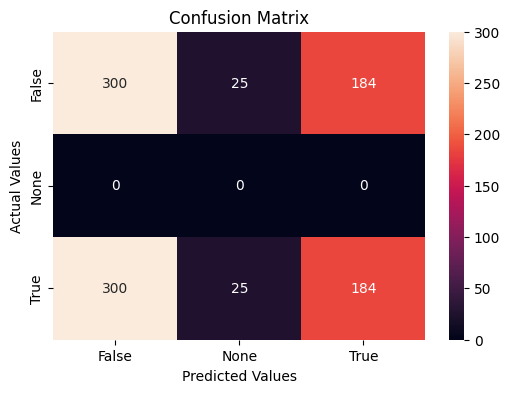

In [126]:
inconsis_acc4= accuracy_score(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
print("Inconsistent GPT4 actual\n",inconsistent_GPT4.Entailment_actual.value_counts())
print("------------------------------------------------------------------------------")
print("Inconsistent GPT4\n",inconsistent_GPT4.GPT4_ET.value_counts())
print("------------------------------------------------------------------------------")
print(f"Accuracy: {inconsis_acc4 * 100:.2f}%")
precision = precision_score(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, average=None)
print("Precision of 'False','None','True'", str(list(map('{:.2f}'.format,precision))))
f1 = f1_score(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, average=None)
print("F1 of 'False','None','True'",str(list(map('{:.2f}'.format,f1))))
recall = recall_score(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET,average=None)
print("Recall of 'False','None','True'",str(list(map('{:.2f}'.format,recall))))
print("-----------------------------------------------------------------------------")
# confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
# pd.crosstab(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET, rownames = ['Actual'], colnames =['Predicted'], margins = True)
cm = confusion_matrix(inconsistent_GPT4.Entailment_actual, inconsistent_GPT4.GPT4_ET)
plt.figure(figsize=(6,4))
cm_df = pd.DataFrame(cm,
                     index = ['False','None','True'],
                     columns = ['False','None','True'])
print(cm_df)
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()